In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datos/datos_entrenamiento_laboratorio1(train_data).csv')


df[['cantidad', 'sufijo']] = df['market_value'].replace({  '-': np.nan, "error": np.nan}, regex=True).str.extract(r'€?([\d\.]+)([mk]?)')
df['cantidad'] = df['cantidad'].astype(float)

# Convertir según sufijo
df['precio_miles'] = df.apply(
    lambda row: row['cantidad'] * 1000 if row['sufijo'] == 'm' else row['cantidad'],
    axis=1
)

print(df.head())

null_counts = df.isnull().sum()
print(null_counts)

char = '-'
char_counts = df.apply(lambda col: col.astype(str).str.count(char).sum())
print(char_counts)


              Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  ...  Pases_progresivos_recibidos  \
0      0              6  1.2   1.2  0.0  ...                            7   
1      0              0  0.0   0.0  0.7  ...                            9   
2      0              0  0.0   0.0  0.1  ...                            7   
3     -5              0  0.0   0.0  0.1  ...                            7   
4      0              2  0.7   0.7  0.2  ...                            3   

   Faltas_cometidas  Centros  Duelos_aereos_ganados  \
0      

{'Goles': np.float64(0.5894665330112142), 'Tiros Totales': np.float64(0.009810353236055678), 'xG': np.float64(0.013941649968614642), 'npxG': np.float64(0.010181823385182738), 'xAG': np.float64(0.0073320181268002795), 'xAG.1': np.float64(0.0073320181268002795), 'Acciones_que_crean_tiros': np.float64(0.011209291574245963), 'Pases_intentados': np.float64(0.017545590362976073), 'Pases_intentados.1': np.float64(0.017545590362976073), 'Pases_intentados.2': np.float64(0.017545590362976073), 'Pases_progresivos': np.float64(0.016143818947260035), 'Pases_progresivos.1': np.float64(0.016143818947260035), 'Regates_exitosos': np.float64(0.006544725965318835), 'Regates_exitosos.1': np.float64(0.006544725965318835), 'Pases_medios_completados': np.float64(0.01763981538503823), 'Pases_largos_completados': np.float64(0.009422421283588835), 'xAG.2': np.float64(0.0073320181268002795), 'xAG.3': np.float64(0.0073320181268002795), 'xA': np.float64(0.0062992643561727525), 'Pases_en_ultimo_tercio': np.float64(

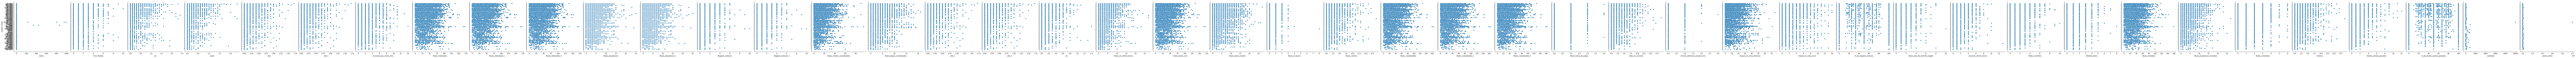

In [ ]:
columnas = list(df.columns)
number_columns = df.select_dtypes(include=[np.number]).columns

sns.pairplot(df.sample(frac=0.2), height=5, y_vars="precio_miles", x_vars=number_columns, kind="scatter")

correlacion = {}
contador  = 0
for all in df.columns:
    if contador < 5:
        contador += 1
        continue

    if contador == 48:
        contador += 1
        break

    correlacion[all] = df['precio_miles'].corr(df[all])
    contador += 1

print(correlacion)

